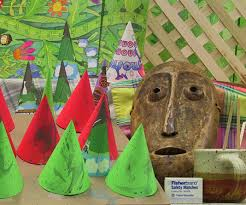

In [66]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('Cones.jpg')
cv2_imshow(image)

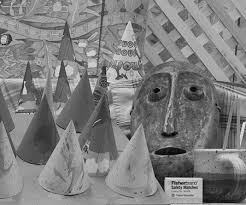

In [67]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image)

In [68]:
img_blur = cv2.GaussianBlur(gray_image, (3,3), 0)

In [69]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 

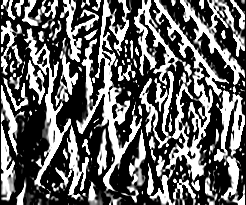

In [70]:
cv2_imshow(sobelx)

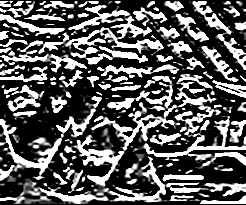

In [71]:
cv2_imshow(sobely)

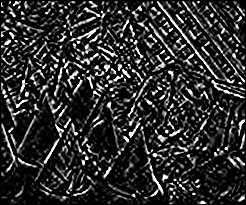

In [72]:
cv2_imshow(sobelxy)

In [73]:
edges_1 = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

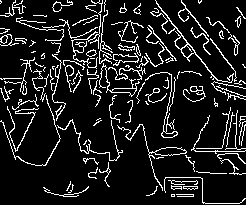

In [74]:
cv2_imshow(edges_1)

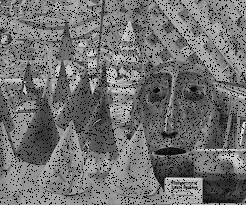

In [75]:
import random

def add_noise(img):
  
    row , col = img.shape
      
    number_of_pixels = 2
    for i in range(number_of_pixels):
        
        y_coord=random.randint(0, row - 1)
          
        x_coord=random.randint(0, col - 1)
          
        img[y_coord][x_coord] = 255
          
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        
        y_coord=random.randint(0, row - 1)
          
        x_coord=random.randint(0, col - 1)
          
        img[y_coord][x_coord] = 0
          
    return img
  

add_noise(gray_image)

cv2_imshow(gray_image)

In [76]:
img_blur = cv2.GaussianBlur(gray_image, (3,3), 0) 

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 

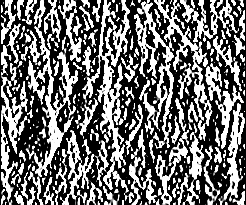

In [77]:
cv2_imshow(sobelx)

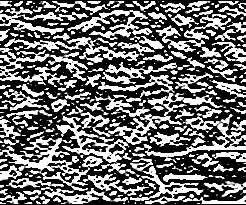

In [78]:
cv2_imshow(sobely)

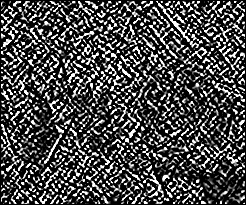

In [79]:
cv2_imshow(sobelxy)

In [80]:
edges_2 = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 

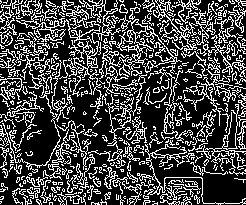

In [81]:
cv2_imshow(edges_2)

In [82]:
from math import ceil
import numpy as np

def mean_filter(image, n):
  inv_n = 1/(n**2)
  modified_image = np.ones([image.shape[0], image.shape[1]]).astype(int)
  for i in range(len(image)):
    for j in range(len(image[i])):
      sum = 0
      if (i + n >= len(image)):
        break
      for x in range(i, i + n):
        if (j + n >= len(image[i])):
          break
        for y in range(j, j + n):
          sum = sum + image[x][y]
      media = sum*inv_n
      x_y = ceil(n/2) - 2
      modified_image[x - x_y][y - x_y] = media
  return modified_image

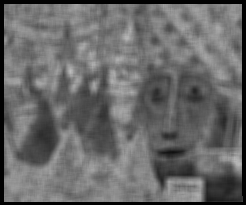

In [83]:
mean_filtered_image = mean_filter(gray_image, 7)
cv2_imshow(mean_filtered_image)

In [84]:
def median_filter(image, n):
  modified_image = np.ones([image.shape[0], image.shape[1]]).astype(int)
  for i in range(len(image)):
    for j in range(len(image[i])):
      if (i + n >= len(image)):
        break
      pixels = []
      for x in range(i, i + n):
        if (j + n >= len(image[i])):
          break
        for y in range(j, j + n):
          pixels.append(image[x][y])
      pixels.sort()
      x_y = ceil(n/2) - 2
      if (len(pixels) != 0):
        modified_image[x - x_y][y - x_y] = pixels[ceil(len(pixels)/2) - 1]
  return modified_image

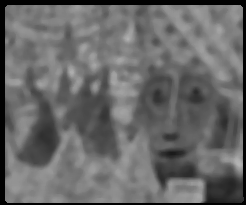

In [85]:
median_filtered_image = median_filter(mean_filtered_image, 5)
cv2_imshow(median_filtered_image)

In [89]:
edges_1

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ...,   0,   0,   0],
       [  0, 255,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [94]:
edges_2

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255,   0, ..., 255, 255, 255],
       [  0, 255,   0, ...,   0,   0,   0],
       ...,
       [  0, 255,   0, ...,   0, 255,   0],
       [255,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [93]:
bhattacharyya = np.sum(np.sqrt(edges_1 * edges_2))

print(bhattacharyya)

3570.0


In order to enhance or detect edges in an image, filters are mostly employed in image processing to either suppress high frequencies or low frequencies in the image. Either a spatial or a frequency filter can be applied to an image.